In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
import numpy as np
import re

In [3]:
# Read CSV file
data = []
with open('./csv_files/first_connections_mod.csv','r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter = ';')
    for row in csvreader:
        data.append(row)
data[0]

['Madhu Shurpali',
 '/in/madhu-shurpali-2aabab14/',
 'Project Manager at Tata Technologies',
 'Coventry, United Kingdom',
 '10 Mutual Connections',
 'June 6, 2019',
 '/search/results/people/?facetConnectionOf=%5B%22ACoAAAMGOeIBIB4jU9iHfDomXW9J5bJtGQUy7HQ%22%5D&facetNetwork=%5B%22F%22%2C%22S%22%5D&origin=MEMBER_PROFILE_CANNED_SEARCH']

In [4]:
df = pd.DataFrame(data, columns = ['name','link','occupation','location','mutual_raw',\
                                   'date_connected_string','see_connections_link'])

In [5]:
df.head()

,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link
0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...
1,Ivan Lafuenti,/in/ivan-l-b7458932/,Design Engineering at Giannuzzi srl,"Brindisi Area, Italy","['2 Mutual Connections', 'You both studied at ...","May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...
2,Tiziano Ruggiero,/in/tiziano-ruggiero-2011b2164/,Responsabile del reparto tecnico di produzione...,"Avezzano, Abruzzo, Italy",Tiziano started a new position as Responsabile...,"May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...
3,Antonio Guerrieri,/in/antonio-guerrieri/,Ingegnere at Università del Salento,"Lecce, Apulia, Italy",You both studied at Università del Salento,"May 29, 2019",/search/results/people/?facetConnectionOf=%5B%...
4,Lorenzo Gagliardi,/in/lorenzo-gagliardi-72049b45/,Ing,"Savona, Liguria, Italy","['19 Mutual Connections', 'You both worked at ...","May 2, 2019",/search/results/people/?facetConnectionOf=%5B%...


In [6]:
# Converts date_strings to datetime
dc = []
dcs= df['date_connected_string']
for dat in dcs:
    dc.append(dt. strptime(dat,'%B %d, %Y'))


In [7]:
df['date_connected'] = dc

In [8]:
df.head()

,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link,date_connected
0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-06-06
1,Ivan Lafuenti,/in/ivan-l-b7458932/,Design Engineering at Giannuzzi srl,"Brindisi Area, Italy","['2 Mutual Connections', 'You both studied at ...","May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30
2,Tiziano Ruggiero,/in/tiziano-ruggiero-2011b2164/,Responsabile del reparto tecnico di produzione...,"Avezzano, Abruzzo, Italy",Tiziano started a new position as Responsabile...,"May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30
3,Antonio Guerrieri,/in/antonio-guerrieri/,Ingegnere at Università del Salento,"Lecce, Apulia, Italy",You both studied at Università del Salento,"May 29, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-29
4,Lorenzo Gagliardi,/in/lorenzo-gagliardi-72049b45/,Ing,"Savona, Liguria, Italy","['19 Mutual Connections', 'You both worked at ...","May 2, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-02


In [69]:
inizio = pd.Timestamp('2013-01-01')
fine = pd.Timestamp('2020-01-01')
rbin = np.linspace(inizio.value, fine.value, 15)
rbint = pd.to_datetime(rbin)
rbint

DatetimeIndex([          '2013-01-01 00:00:00',
               '2013-07-02 13:42:51.428571392',
               '2014-01-01 03:25:42.857142784',
               '2014-07-02 17:08:34.285714176',
               '2015-01-01 06:51:25.714285824',
               '2015-07-02 20:34:17.142857216',
               '2016-01-01 10:17:08.571428608',
                         '2016-07-02 00:00:00',
               '2016-12-31 13:42:51.428571392',
               '2017-07-02 03:25:42.857142784',
               '2017-12-31 17:08:34.285714176',
               '2018-07-02 06:51:25.714285568',
               '2018-12-31 20:34:17.142857216',
               '2019-07-02 10:17:08.571428608',
                         '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Text(0.5, 1.0, 'New Linkedin connections vs. time')

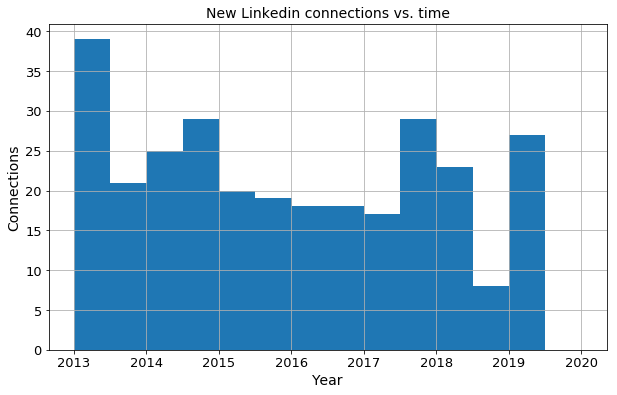

In [14]:
yearly_divisions = 2
req = np.linspace(start = 734925-55, stop = 737216+210, num = 7*yearly_divisions+1)
plt.figure(figsize = (10,6))

bin_edges = plt.hist(df['date_connected'], bins = req, alpha = 1,histtype ='bar');
plt.grid(True)
plt.ylabel('Connections', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.xticks(fontsize =13)
plt.yticks(fontsize = 13)
plt.title('New Linkedin connections vs. time', fontsize = 14);
#plt.savefig('foo.png')

In [25]:
# Filter by period
lowDate = '2018-07-01'
highDate = '2019-01-01'
ix =  (df['date_connected']> pd.Timestamp(lowDate)) & (df['date_connected'] < pd.Timestamp(highDate)) 
df['name'][ix]

27          Melita Ignatjeva
28              Pete Newbury
29          Davide Lucarelli
30    Angel Andres Fernandez
31         GIORGIO PRIMORDIO
32            Dominic Taylor
33            Sephton Wilson
34                 Geoff Day
Name: name, dtype: object

# Proc location

In [81]:
city = []
region = []
country = []

for location in df['location']:
    tt = re.split(',', location)
    # country is always last
    country.append(tt[len(tt)-1].strip())
    if len(tt)>1:
        city.append( re.sub('Area', '', tt[0]).strip())
    else:
        city.append('')
        
    if len(tt)>2:
        region.append( tt[1].strip())
    else:
        region.append('')
    if len(tt)>3:
        print(location)
    

In [82]:
rf = []
for k in range(293):
    if 'New York' in country[k]:
        rf.append(k)
        
    

In [83]:
print(df['location'][rf])

62             New York, New York
150         Pearl River, New York
195    Greater New York City Area
Name: location, dtype: object


In [88]:
ix = rf[2]
print(city[ix])
print(region[ix])
print(country[ix])



Greater New York City Area


In [89]:

#city[ix])
region[ix] = 'New York'
country[ix] = 'USA'

In [104]:
region[204] = 'Greater Boston Area'
country[204] = 'USA'

In [105]:
df['city'] = city
df['region'] = region
df['country'] = country

# Loc

In [142]:
country_count = df.groupby('country')['country'].count()

country_count = pd.DataFrame(country_count)
country_count.index.name ='foo'
country_count = country_count.sort_values('country', ascending = False)
country_count

,country
foo,
United Kingdom,121
Italy,111
Germany,15
Spain,12
China,5
USA,4
India,4
Ireland,3
France,2


TypeError: 'tuple' object is not callable

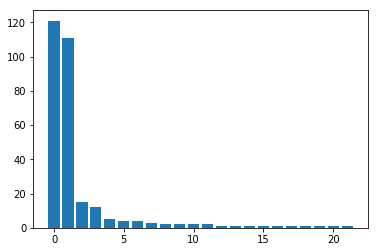

In [171]:
x = range(22)
plt.bar(x, country_count['country'])
plt.xticks(x)


TypeError: 'tuple' object is not callable

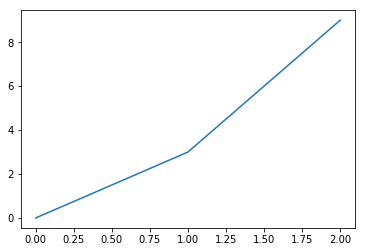

In [172]:
plt.plot([0 ,3, 9])
plt.xticks([0, 1, 2])

In [165]:
country_count.index

Index(['United Kingdom', 'Italy', 'Germany', 'Spain', 'China', 'USA', 'India',
       'Ireland', 'France', 'Belgium', 'Netherlands', 'Brazil', 'Georgia',
       'Hong Kong', 'Czech Republic', 'Japan', 'Ohio', 'Canada', 'Sweden',
       'Turkey', 'United Arab Emirates', ''],
      dtype='object', name='foo')

# exp to csv

In [108]:
df.to_csv(path_or_buf = 'first_vs.csv', sep = ';')

# ss

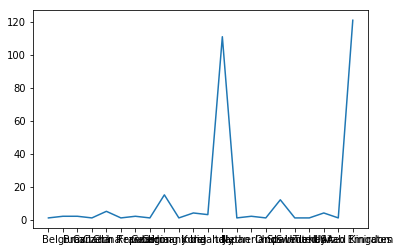

In [116]:
plt.plot(country_count)
plt.show()